In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
#loading the dataset 
healthcare_data = pd.read_excel('Helthcare dataset.xlsx')

In [3]:
healthcare_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#Checking for the Null values
healthcare_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# checking for the summary
healthcare_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


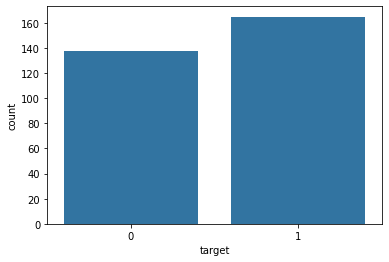

In [7]:
# count plot
sns.countplot(x=healthcare_data['target'])
plt.show()

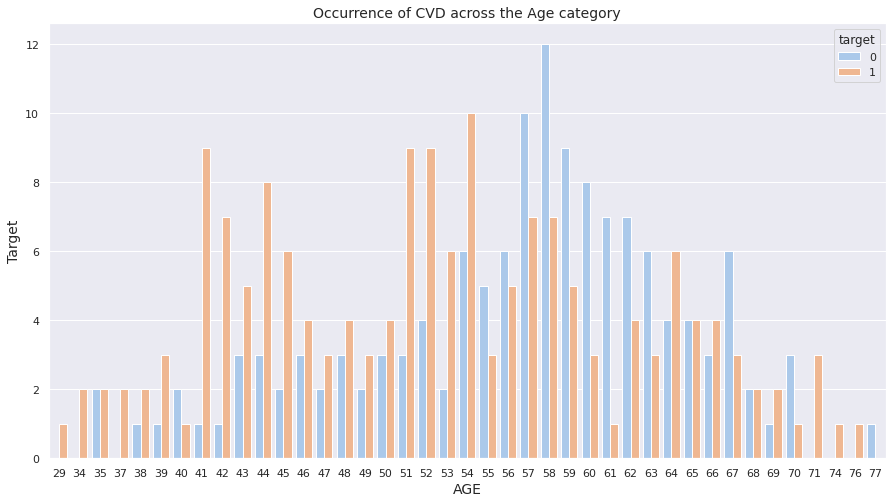

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot( x = 'age' , hue = 'target', data=healthcare_data, palette='pastel' )
plt.xlabel('AGE',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Occurrence of CVD across the Age category',fontsize=14)
plt.show()



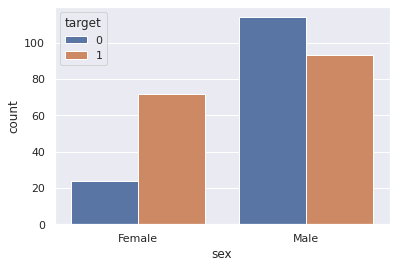

In [9]:
#occurence of cvd according to sex
sns.countplot(x='sex' ,hue= 'target',data= healthcare_data)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

In [10]:
#here no. of female petient is low while high tendency or noumber cvd in female is more than female not having cvd
#number of male patients are more but ratio is less male patient having cvd

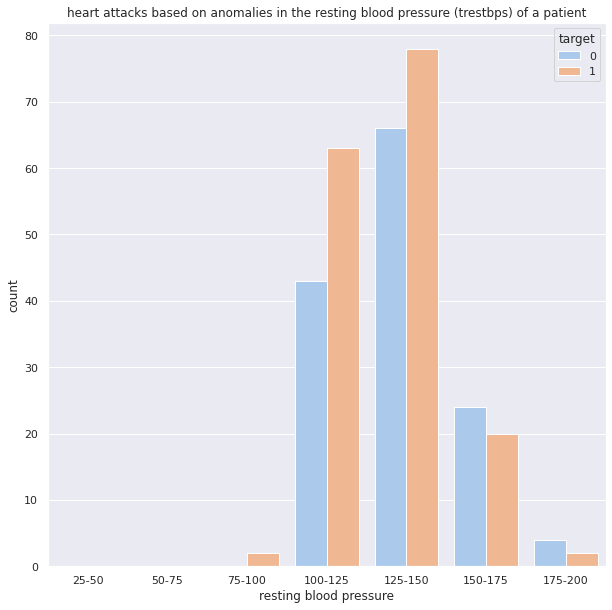

In [11]:
#checking heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
#creating bins
bins = [25,50,75,100,125,150,175,200]
labels = ['25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175-200']
healthcare_data['trestbps_bins'] = pd.cut(healthcare_data['trestbps'], bins=bins, labels=labels, right=False)

#ploting
plt.figure(figsize=(10,10))
sns.countplot( x ='trestbps_bins', hue = 'target',data = healthcare_data , palette='pastel')
plt.xlabel('resting blood pressure')
plt.title('heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient')
plt.show()


Text(0.5, 1.0, 'CVD according to cholestrol levels')

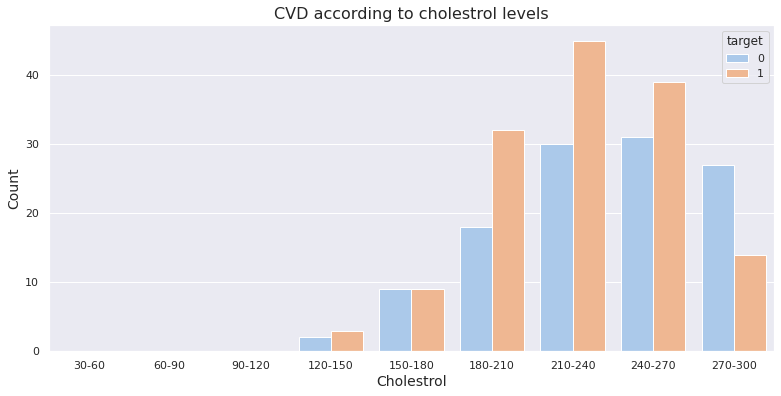

In [12]:
# checking relationship between cholesterol levels and a target variable
bins = [30,60,90,120,150,180,210,240,270,300]
labels = ['30-60','60-90','90-120','120-150','150-180','180-210','210-240','240-270','270-300']
healthcare_data['chol_bins'] = pd.cut(healthcare_data['chol'], bins = bins , labels=labels, right = False )
plt.figure(figsize=(13, 6))
sns.countplot(x='chol_bins', hue ='target', data= healthcare_data, palette='pastel')
plt.xlabel('Cholestrol', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('CVD according to cholestrol levels', fontsize=16)


In [13]:
#checking Correlation
healthcare_data.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Figure size 720x2664 with 0 Axes>

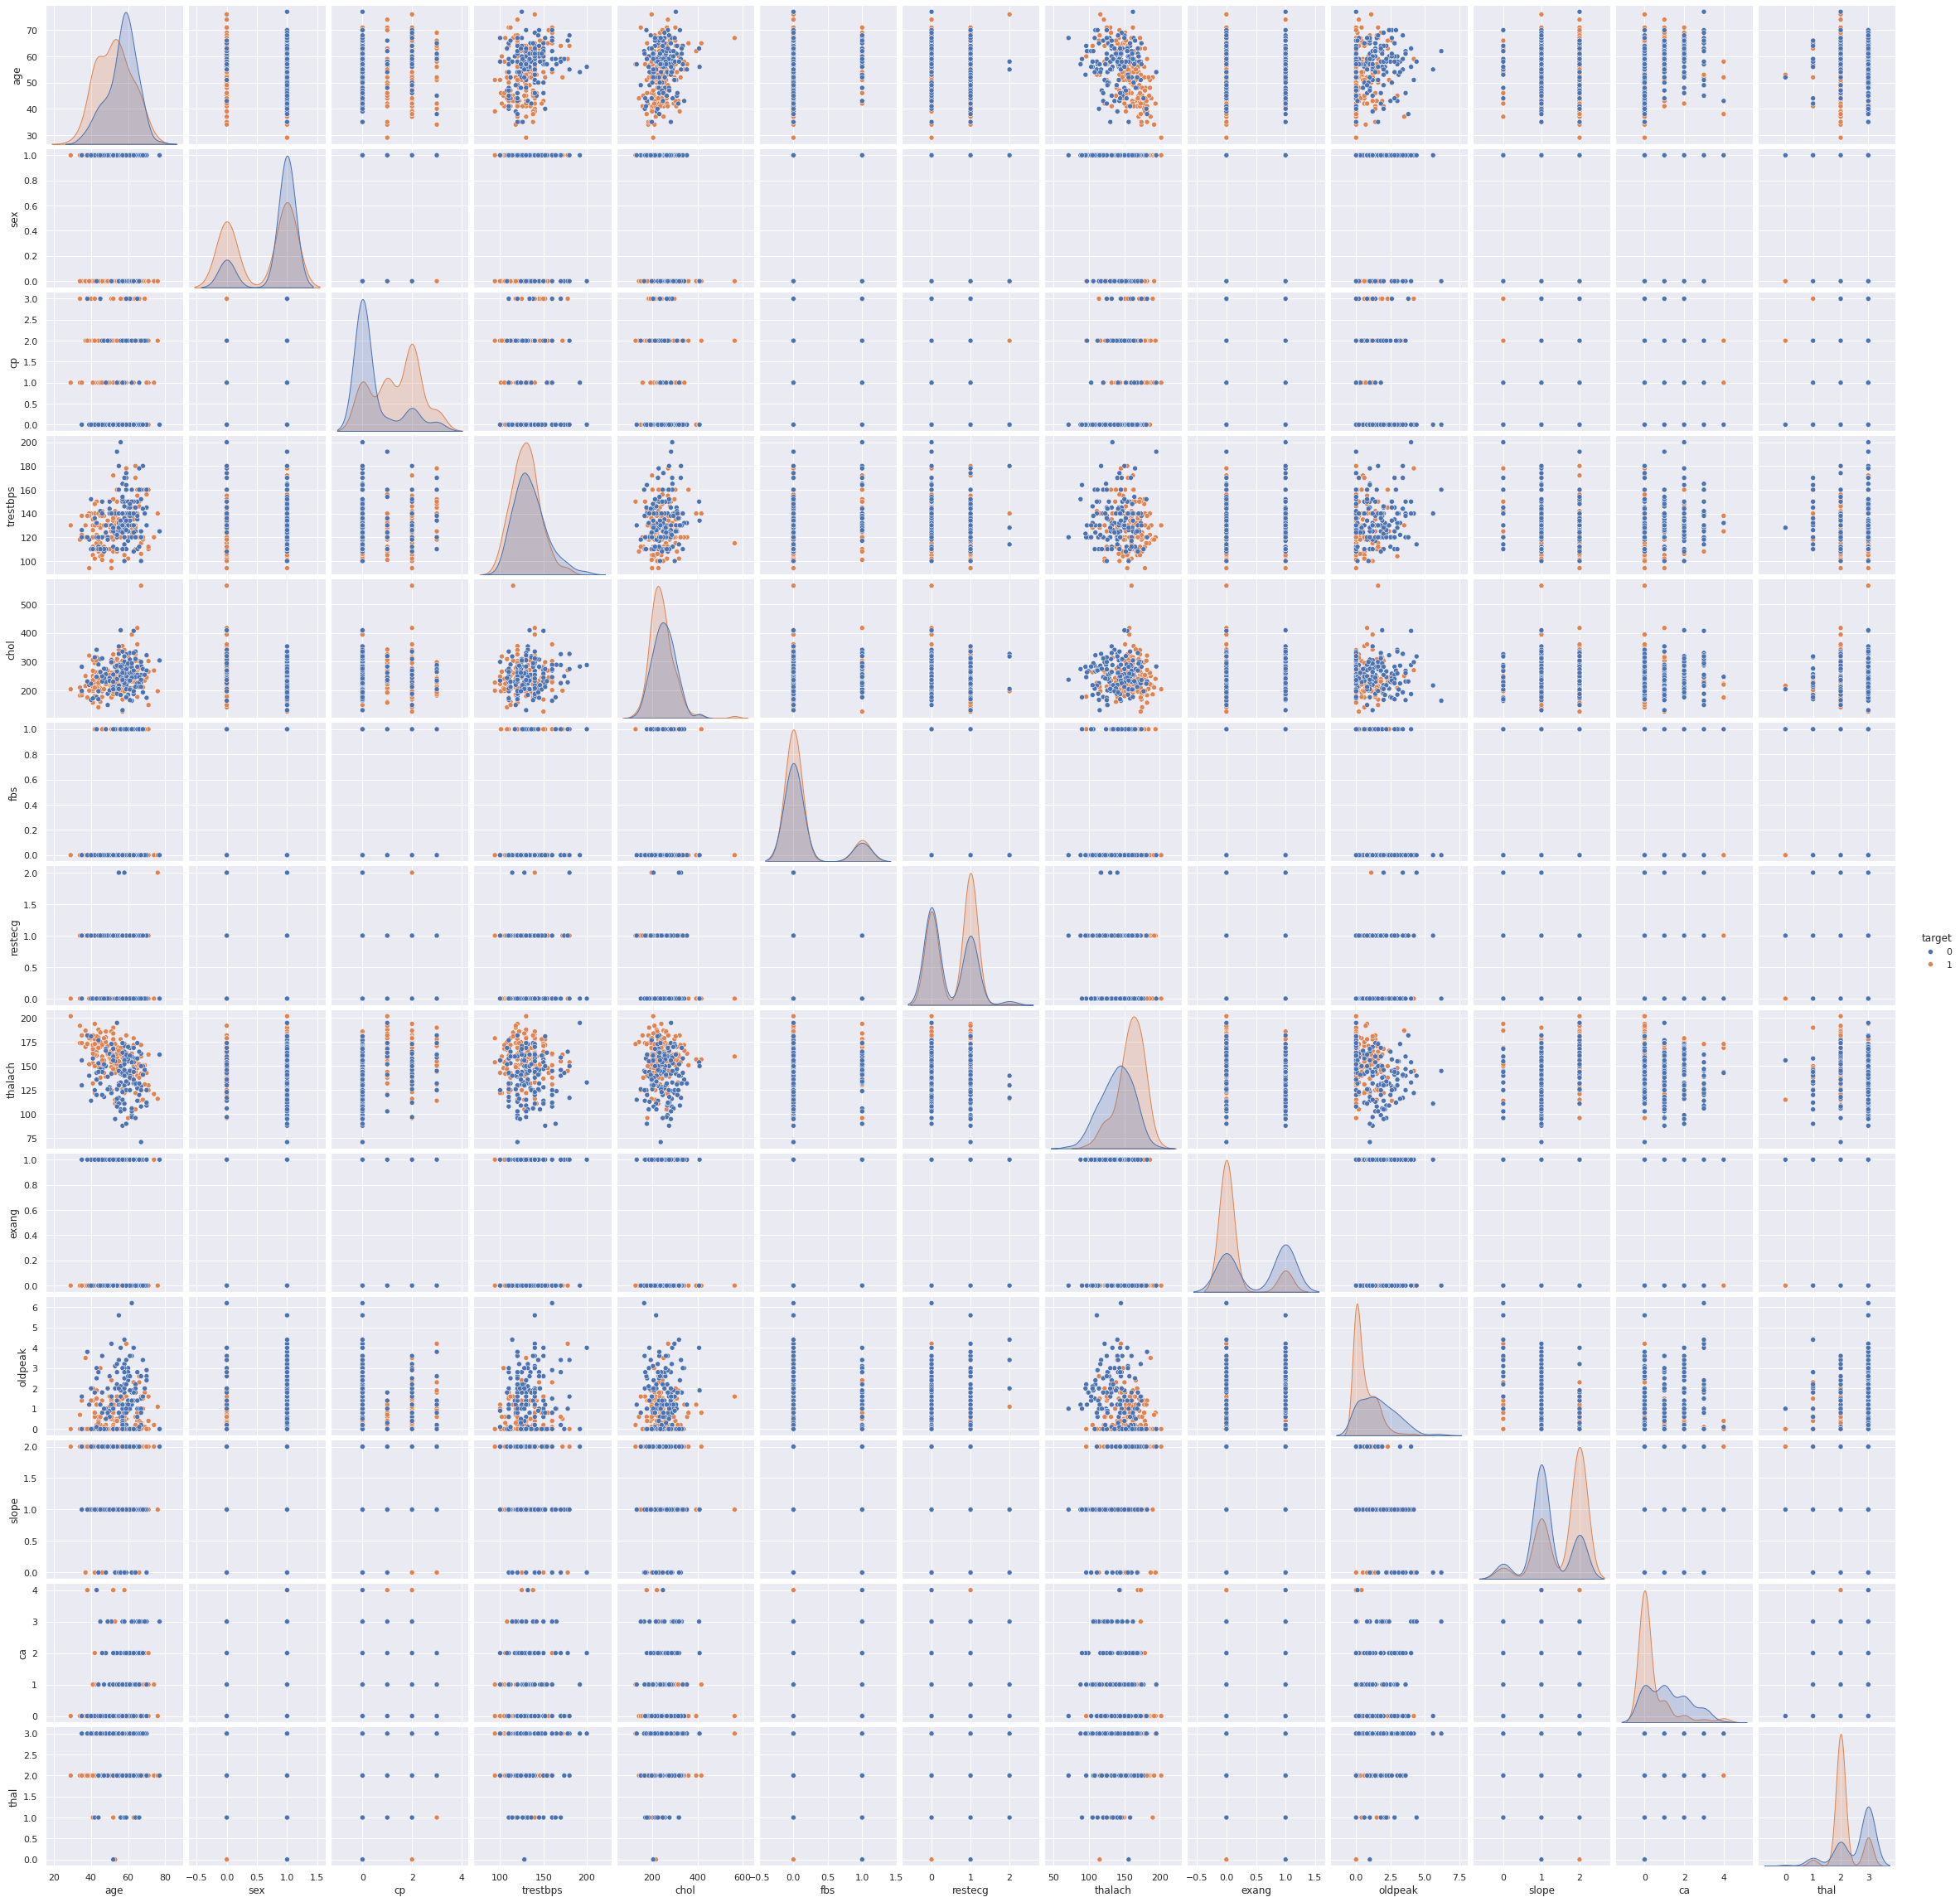

In [14]:
#plotting pairplot
plt.figure(figsize=(10,37))
sns.pairplot(data=healthcare_data , hue = 'target')

In [15]:
drop_col = ['cp','restecg' ,'thalach','slope','oldpeak','trestbps_bins', 'chol_bins']
healthcare_data = healthcare_data.drop(drop_col , axis=1)

In [16]:
healthcare_data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'exang', 'ca', 'thal',
       'target'],
      dtype='object')

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [18]:
#spliting of data
X = healthcare_data.drop('target', axis= 1)
y = healthcare_data['target']

In [19]:
X.head()
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   trestbps  303 non-null    int64
 3   chol      303 non-null    int64
 4   fbs       303 non-null    int64
 5   exang     303 non-null    int64
 6   ca        303 non-null    int64
 7   thal      303 non-null    int64
dtypes: int64(8)
memory usage: 19.1 KB


In [20]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test , y_train ,y_test =train_test_split(X,y,test_size=0.10,random_state =369)

In [22]:
lr = lr.fit(X_train ,y_train)

In [23]:
pred = lr.predict(X_test)

In [24]:
#checking for confusion matrix and Accuracy score
from sklearn.metrics import confusion_matrix

In [25]:
confusion_mat= confusion_matrix(y_test,pred)

In [26]:
print(confusion_mat)

[[11  2]
 [ 2 16]]


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
r2 = accuracy_score(y_test,pred)

In [29]:
print(r2)

0.8709677419354839


## Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
clf = RandomForestClassifier( criterion = 'gini' , max_depth =  5 , n_estimators = 50 , random_state = 369 )

In [32]:
clf = clf.fit(X_train ,y_train)

In [33]:
predict = clf.predict(X_test)

In [34]:
#confusion matrix and accuracy score
confusion_matrix = confusion_matrix(y_test , predict )
accuracy =  accuracy_score(y_test ,predict)

In [35]:
print(confusion_matrix)
print(accuracy)

[[12  1]
 [ 2 16]]
0.9032258064516129
